In [325]:
# import standard libraries
import numpy as np 
# imoport third-party libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
# import local libraries
import utils as ut

In [326]:
# load data 
df = pd.read_csv('customers.csv')

# Data Cleaning

In [327]:
# display info of dataset
display(df.count())
print('Numnber of columns: {}'.format(len(df.columns)))

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

Numnber of columns: 21


> <span style="color:black;font-size:120%">We have at hand a dataset with 7043 rows and 21 columns. </span>

In [328]:
# display some samples of the dataset
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [329]:
# display column types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

> <span style="color:black;font-size:120%">Checking for the types of the different columns, we see that TotalCharges is defined as a Python object. We start by converting them to floats. </span>

In [330]:
# convert column TotalCharges to numeric
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

## Handling missing values

In [331]:
# show missing values
display(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

 > <span style="color:black;font-size:120%">There are 11 missing values of TotalCharges in our dataset. Let's zoom in to see in detail the data with missing cells. </span>

In [332]:
# filter only rows with nan values
null_df = df[df.isnull().any(axis = 1)]
display(null_df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


 > <span style="color:black;font-size:120%">We observe that rows with missing value TotalCharges are actually newly susbcribed customers with tenure of 0. Since we are mainly interested in the **lifetime** value of **loyal** customers, we will drop these rows as well as rows where customers have churned. </span>

In [333]:
# drop rows with nan values and keep rows where churn = 0
df = df.dropna(axis = 0, how = 'any')
df = df[df.Churn == 'No']

In [334]:
display(df.count())

customerID          5163
gender              5163
SeniorCitizen       5163
Partner             5163
Dependents          5163
tenure              5163
PhoneService        5163
MultipleLines       5163
InternetService     5163
OnlineSecurity      5163
OnlineBackup        5163
DeviceProtection    5163
TechSupport         5163
StreamingTV         5163
StreamingMovies     5163
Contract            5163
PaperlessBilling    5163
PaymentMethod       5163
MonthlyCharges      5163
TotalCharges        5163
Churn               5163
dtype: int64

 > <span style="color:black;font-size:120%">After filtering the data, we are left with 5163 entries. </span>

# Exploratory Data Analysis

## Gender vs. tenure vs. monthly charges

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,2544.0,37.933176,23.953706,1.0,15.0,39.0,61.0,72.0
Male,2619.0,37.374952,24.197445,1.0,15.0,37.0,61.0,72.0


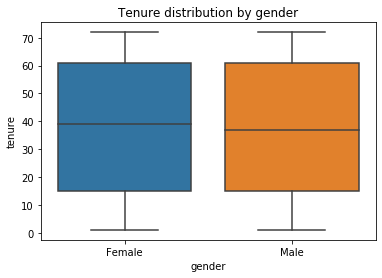

In [335]:
# Groupby gender and show metrics on tenure
display(df.groupby('gender').tenure.describe())
sns.boxplot(x = 'gender', y = 'tenure', data = df)
plt.title('Tenure distribution by gender')
plt.show()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,2544.0,61.674941,31.245731,18.40,25.2,64.525,88.8625,118.75
Male,2619.0,60.950401,30.948793,18.25,25.0,64.400,87.6750,118.20


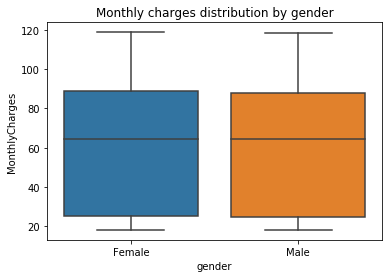

In [336]:
# Groupby gender and show metrics on monthly charges
display(df.groupby('gender').MonthlyCharges.describe())
sns.boxplot(x = 'gender', y = 'MonthlyCharges', data = df)
plt.title('Monthly charges distribution by gender')
plt.show()

 > <span style="color:black;font-size:120%">We see that we have more or less as many female customers as male customers. The distributions for tenure and monthly charges are not statistically different from females to males. Segmenting the customers based on gender is thus not relevant. </span>

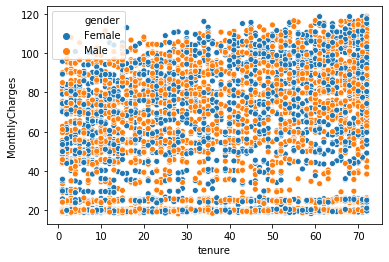

In [337]:
# draw scatter plot of gender vs. tenure vs. monthly charges
ax = sns.scatterplot(x = 'tenure', y = 'MonthlyCharges', hue = 'gender', data = df)

 > <span style="color:black;font-size:120%">Making a scatter plot of monhtly charges vs. tenure for both genders confirms our assumption that segmenting based on gender is irrelevant since we cannot indentify a pattern. </span>

## Seniority vs. tenure vs. monthly charges

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,,,,,,,,
0,4497.0,36.996887,24.134207,1.0,14.0,37.0,60.0,72.0
1,666.0,42.060060,23.228049,1.0,22.0,45.0,64.0,72.0


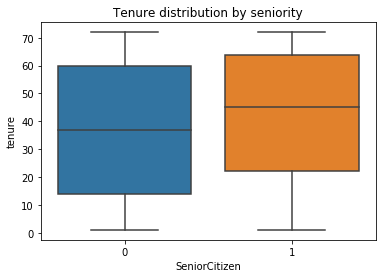

In [338]:
# Groupby seniority and show metrics on tenure
display(df.groupby('SeniorCitizen').tenure.describe())
sns.boxplot(x = 'SeniorCitizen', y = 'tenure', data = df)
plt.title('Tenure distribution by seniority')
plt.show()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,,,,,,,,
0,4497.0,58.660196,30.971141,18.25,24.4000,59.80,84.900,118.75
1,666.0,79.182057,25.548785,18.95,65.2125,84.85,99.175,117.35


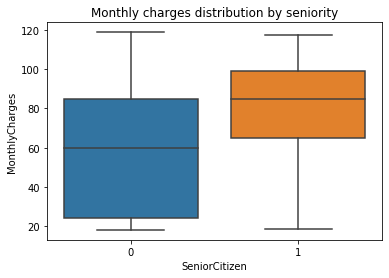

In [339]:
# Groupby seniority and show metrics on monthly charges
display(df.groupby('SeniorCitizen').MonthlyCharges.describe())
sns.boxplot(x = 'SeniorCitizen', y = 'MonthlyCharges', data = df)
plt.title('Monthly charges distribution by seniority')
plt.show()

 > <span style="color:black;font-size:120%">Assuming that 1 corresponds to a senior citizen, this mean that above 80% of the customers are considered non seniors. Considering the former make up for most of the customer base, the strategy could be focused on them. We observe that tenure is shorter and monthly charges lower for young citizens as they probably have less savings and are trying to change provider when a lower cost is observed at the competitor. Moreover, senior citizens have higher tenure although they are charged a higher monthly rate which tells us that this category of demography is less incentive of churning, which is a good assumption for more elderly people. Finally, a longer tenure is more probable with senior citizens since they are older.</span>


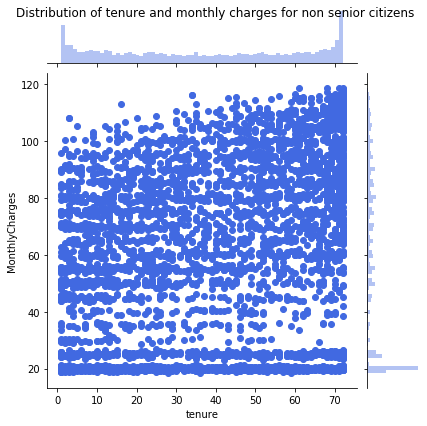

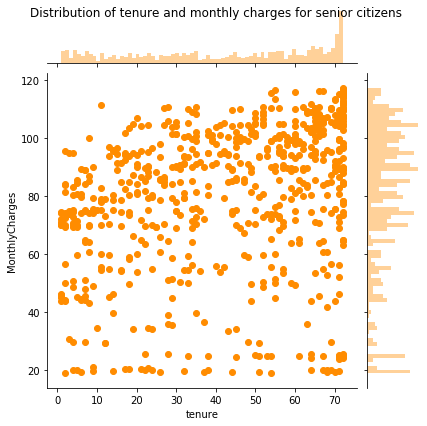

In [340]:
# histogram of tenure and monthly charges for seniority category
df_senior = df[df.SeniorCitizen == 1]
df_nonsenior = df[df.SeniorCitizen == 0]
ax = sns.jointplot(x = 'tenure', y = 'MonthlyCharges', data = df_nonsenior, color = 'royalblue',
                  marginal_kws = dict(bins = max(df_senior.tenure)))
_ = ax.fig.suptitle('Distribution of tenure and monthly charges for non senior citizens')
ax = sns.jointplot(x = 'tenure', y = 'MonthlyCharges', data = df_senior, color = 'darkorange',
                  marginal_kws = dict(bins = max(df_senior.tenure)))
_ = ax.fig.suptitle('Distribution of tenure and monthly charges for senior citizens')

 > <span style="color:black;font-size:120%">We observe that the tenure distributions for senior and non-senior citizens are both U-shape and not significantly different. These plots tell us that tenure duration might not be identifiable by segmenting the customer population into senior and non-senior citizens. </span>

## Partner vs. tenure vs. monthly charges

,count,mean,std,min,25%,50%,75%,max
Partner,,,,,,,,
No,2439.0,28.386224,22.388308,1.0,8.0,24.0,47.0,72.0
Yes,2724.0,45.944567,22.460416,1.0,27.0,51.0,67.0,72.0


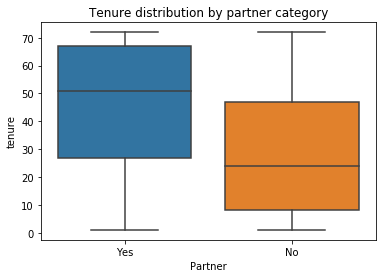

In [341]:
# Groupby partner and show metrics on tenure
display(df.groupby('Partner').tenure.describe())
sns.boxplot(x = 'Partner', y = 'tenure', data = df)
plt.title('Tenure distribution by partner category')
plt.show()

,count,mean,std,min,25%,50%,75%,max
Partner,,,,,,,,
No,2439.0,57.285137,29.896288,18.25,24.35,56.150,81.475,118.65
Yes,2724.0,64.908847,31.704800,18.40,25.65,70.075,91.550,118.75


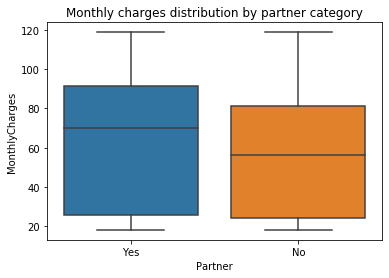

In [342]:
# Groupby partner and show metrics on monthly charges
display(df.groupby('Partner').MonthlyCharges.describe())
sns.boxplot(x = 'Partner', y = 'MonthlyCharges', data = df)
plt.title('Monthly charges distribution by partner category')
plt.show()

 > <span style="color:black;font-size:120%">We observe that there are more or less the same amount of partnered and non-partnered customers. Customers that are not partnered have a much shorter tenure than partnered ones even though on average they pay less on a monthly basis. However, the difference of monthly charges between two groups seems to be too small for it to explain such a short tenure with non-partnered customers. </span>


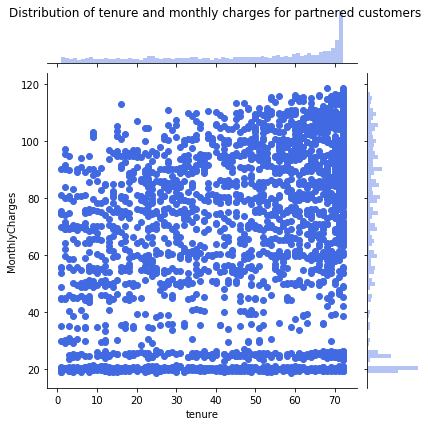

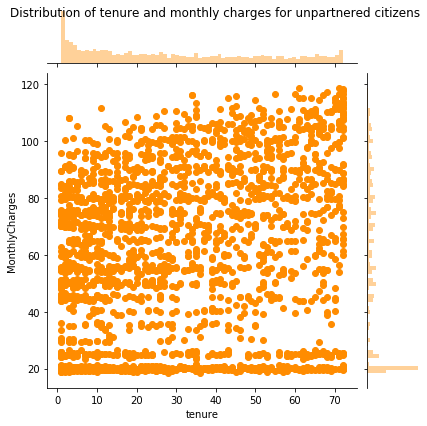

In [343]:
# histogram of tenure and monthly charges for partner category
df_partner = df[df.Partner == 'Yes']
df_notpartner = df[df.Partner == 'No']
ax = sns.jointplot(x = 'tenure', y = 'MonthlyCharges', data = df_partner, color = 'royalblue',
                  marginal_kws = dict(bins = max(df_partner.tenure)))
_ = ax.fig.suptitle('Distribution of tenure and monthly charges for partnered customers')
ax = sns.jointplot(x = 'tenure', y = 'MonthlyCharges', data = df_notpartner, color = 'darkorange',
                  marginal_kws = dict(bins = max(df_notpartner.tenure)))
_ = ax.fig.suptitle('Distribution of tenure and monthly charges for unpartnered citizens')

 > <span style="color:black;font-size:120%">The tenure distributions of partnered and unpartnered customers are asymmetric (the skewnesses are respectively negative and positive). We can clearly observe that being a partner or not is a big contributing factor to tenure length.

## Dependents vs. tenure vs. monthly charges

,count,mean,std,min,25%,50%,75%,max
Dependents,,,,,,,,
No,3390.0,35.578761,24.178583,1.0,12.0,34.0,59.0,72.0
Yes,1773.0,41.610265,23.382598,1.0,21.0,44.0,64.0,72.0


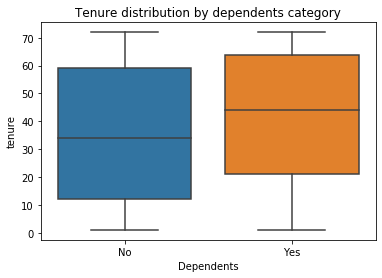

In [344]:
# Groupby dependents and show metrics on tenure
display(df.groupby('Dependents').tenure.describe())
sns.boxplot(x = 'Dependents', y = 'tenure', data = df)
plt.title('Tenure distribution by dependents category')
plt.show()

,count,mean,std,min,25%,50%,75%,max
Dependents,,,,,,,,
No,3390.0,63.465590,30.590659,18.25,29.7625,68.425,89.65,118.65
Yes,1773.0,57.180936,31.637261,18.70,21.1500,58.200,84.80,118.75


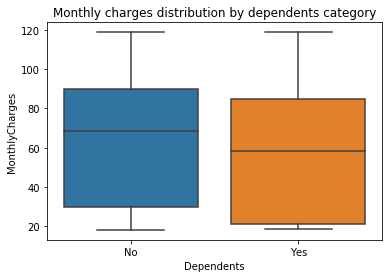

In [345]:
# Groupby dependents and show metrics on monthly charges
display(df.groupby('Dependents').MonthlyCharges.describe())
sns.boxplot(x = 'Dependents', y = 'MonthlyCharges', data = df)
plt.title('Monthly charges distribution by dependents category')
plt.show()

 > <span style="color:black;font-size:120%">There are more or less two times more independent customers than dependent ones. We assume by dependent that the customer does not have a regular monthly income and/or depends on a representative (in the case of a parent-child relationship for example) or a working spouse (the dependent person being a homestay spouse for example). We observe that the monthly charge is sensibly higher for independent customers which is reasonable since people earning their own money are more likely to spend more for themselves than for other people (the dependent category in this case). Finally, a slightly higher tenure can be observed for dependent customers which can either be explained by a lower monthly charge rate or by the fact that dependent customers have less incentive in making an effort in churning (and finding a better alternative) since they are financially dependent on someone else. </span>


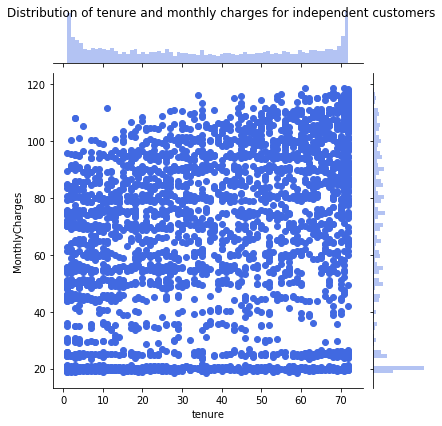

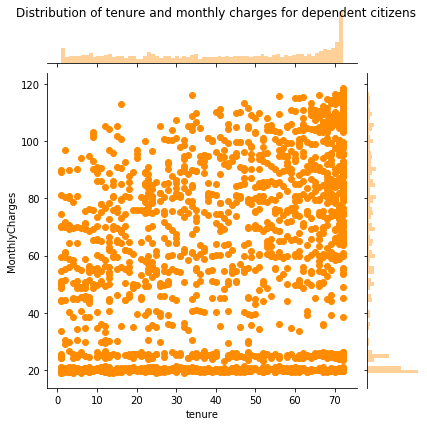

In [346]:
# histogram of tenure and monthly charges for dependents category
df_dependent = df[df.Dependents == 'Yes']
df_independent = df[df.Dependents == 'No']
ax = sns.jointplot(x = 'tenure', y = 'MonthlyCharges', data = df_independent, color = 'royalblue',
                  marginal_kws = dict(bins = max(df_independent.tenure)))
_ = ax.fig.suptitle('Distribution of tenure and monthly charges for independent customers')
ax = sns.jointplot(x = 'tenure', y = 'MonthlyCharges', data = df_dependent, color = 'darkorange',
                  marginal_kws = dict(bins = max(df_dependent.tenure)))
_ = ax.fig.suptitle('Distribution of tenure and monthly charges for dependent citizens')

 > <span style="color:black;font-size:120%">The tenure distributions of dependent and independent customers are asymmetric (the skewnesses are respectively positive and negative). We can clearly observe that being dependent or not is a big contributing factor to tenure length.

 > <span style="color:black;font-size:120%">An exploratory data analysis of customer type tells us that loyal customers are more likely to be independent, partnered, and/or a senior citizen (even though was have seen. that the distribution shapes are similar and U-shape). </span>


## Contract type and loyalty

 > <span style="color:black;font-size:120%">Here we analyze where loyal customers stand with respect to contract type. Since gender is not relevant as seen before, we disregard this categorization of customers. </span>

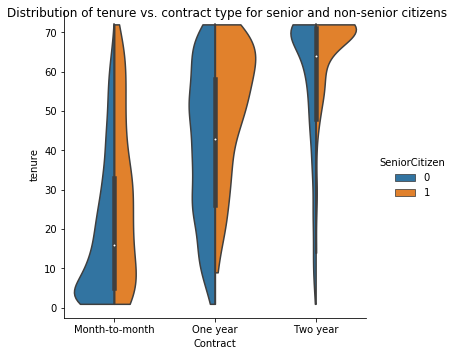

In [347]:
# scatter plot of tenure vs. contract type for SeniorCitizen category
ax = sns.catplot(x = 'Contract', y = 'tenure', hue = 'SeniorCitizen', data = df, kind = 'violin', split = True, cut = 0)
_ = ax.fig.suptitle('Distribution of tenure vs. contract type for senior and non-senior citizens')

 > <span style="color:black;font-size:120%">Above are the violin plots which combine a boxplot with the kernel density function of the distribution of tenure with respect to the different types of contract for both senior and non senior citizens. These plots allow us to analyse how tenure varies across contract types and customer type. We can observe that month-to-month contracts are more vulnerable to premature churning for both demographics. The longer the contract terms, the less people are likely to churn. For a one-year contract, non-senior people are almost indifferent in churning early or late whereas elderly people are more likely to stay in the company. </span>

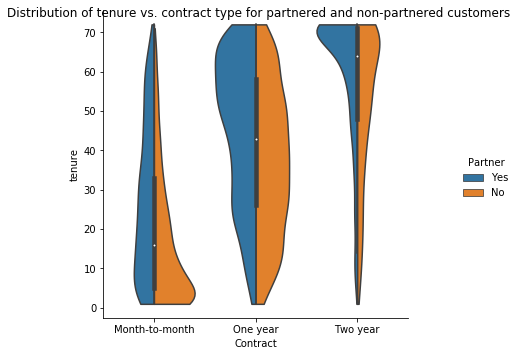

In [348]:
# scatter plot of tenure vs. contract type for partner category
ax = sns.catplot(x = 'Contract', y = 'tenure', hue = 'Partner', data = df, kind = 'violin', split = True, cut = 0)
_ = ax.fig.suptitle('Distribution of tenure vs. contract type for partnered and non-partnered customers')

 > <span style="color:black;font-size:120%"> We observe the same pattern as seen in with the seniority category: the shorter the contract the more susceptible customers are too churn early whereas late churns are reflected in longer contracts. </span>

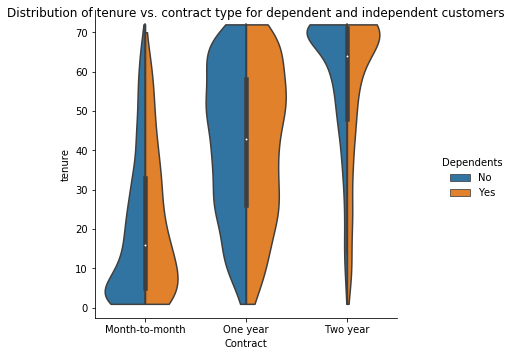

In [349]:
# scatter plot of tenure vs. contract type for independents category
ax = sns.catplot(x = 'Contract', y = 'tenure', hue = 'Dependents', data = df, kind = 'violin', split = True, cut = 0)
_ = ax.fig.suptitle('Distribution of tenure vs. contract type for dependent and independent customers')

 > <span style="color:black;font-size:120%"> We observe the same patterns. </span>

 > <span style="color:black;font-size:120%"> In conclusion shorter contracts induce earlier churns and longer contracts imply later churns for all customer types. </span>

## Payment method and loyalty

 > <span style="color:black;font-size:120%">Here we analyze whether the payment method has an influence on tenure. </span>

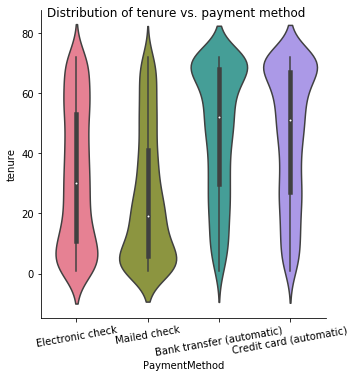

In [350]:
# violin plot of tenure vs. payment method
ax = sns.catplot(x = 'PaymentMethod', y = 'tenure', data = df, kind = 'violin', palette = 'husl')
_ = ax.set_xticklabels(rotation = 10)
_ = ax.fig.suptitle('Distribution of tenure vs. payment method')

 > <span style="color:black;font-size:120%">We clearly see that non-automatic payment methods imply shorter tenure while automatic payment methods encourage longer tenure. This is reasonable since manually paying a bill every month allows the customer to assess how much is actually being paid and the evolution of monthly charges. With automatic payment methods, this can very rapidly be overlooked. </span>

 > <span style="color:black;font-size:120%">We can deploy the same method as done with the payment methods and observe that customers with longer tenure on average have multiple lines, online security, online backup, device protection, tech support, streaming TV, and streaming movies (see one example below). This means that these services and products keep customers in the company (do not make customers flee due to bad quality). </span>

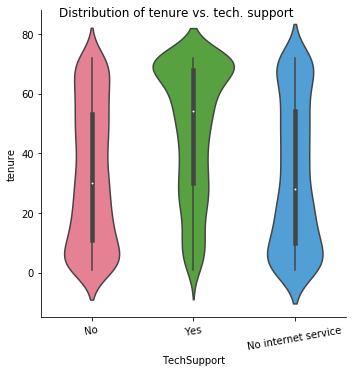

In [351]:
# EXAMPLE: violin plot of tenure vs. tech support 
ax = sns.catplot(x = 'TechSupport', y = 'tenure', data = df, kind = 'violin', palette = 'husl', split = True)
_ = ax.set_xticklabels(rotation = 10)
_ = ax.fig.suptitle('Distribution of tenure vs. tech. support')

# Cramer-based correlation heatmap

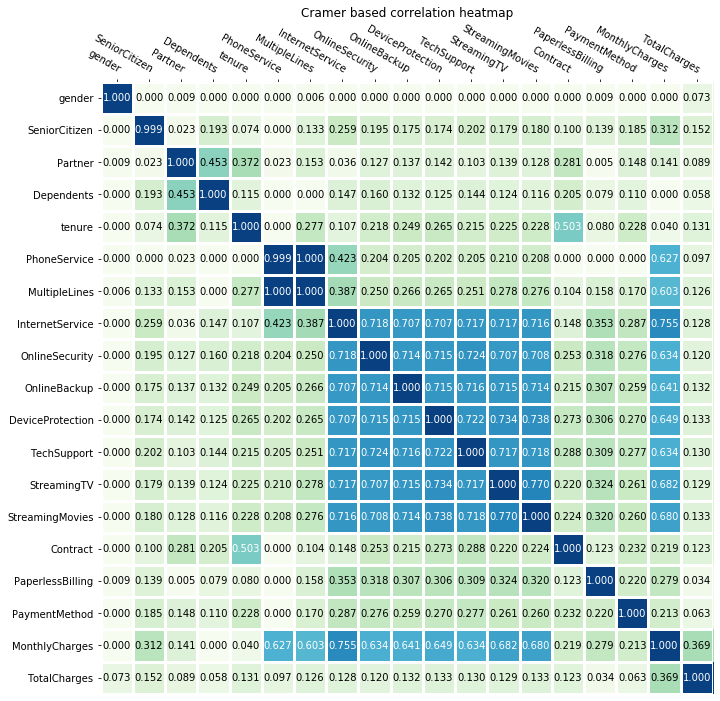

In [356]:
df_dropchurn = df.drop(columns = 'Churn')
matrixCramer = pd.DataFrame(index = df_dropchurn.columns.values[1:], columns = df_dropchurn.columns.values[1:], dtype = float)

for colname, colval in df_dropchurn.iloc[:,1:].iteritems(): 
    for col2name, col2val in df_dropchurn.iloc[:,1:].iteritems(): 
        valC = ut.cramers_v(colval, col2val)
        matrixCramer.loc[colname, col2name] = valC 

ut.plot_heatmap(matrixCramer,'Cramer based correlation heatmap')

 > <span style="color:black;font-size:120%">A Cramer-based correlation matrix allows us to compare between categorical variables. From the matrix, we can see that gender is irrelevant to tenure as we suggested in the beginning. Morever, we observe that partnership and contract type are correlated with tenure but this does not necessarily cause longer or shorter tenure (causality). However, from a purely logical point of view, the causality aspect can be accepted. On the other hand, our assumption that seniority and dependency influences tenure lenght is not completely true.</span>

# Conclusion

 > <span style="color:black;font-size:120%"> From our EDA, we conclude that senior citizens, partnered and independent customers are most likely to stay with the company. Longer-contracts and automatic payment methods help the company in keeping customers for a longer period of time. </span>